# Diabetic retinopathy prediction in patients 
## Business Objective:
**The variable to be predicted has two values (positive or negative on diabetic retinopathy). Thus, this is a binary classification project. The goal here is to predict whether a patient will suffer from diabetic retinopathy or not, conditioned on blood test features.
Data Set Details:
Target variables has two values in a classification project type: 0 (false) or 1 (true). The number of instances (rows) in the data set is 6000, and the number of variables (columns) is 6.
The following list summarizes the information of the variables**

### 1)ID: Numeric
### 2)age: (numeric).
### 3)systolic_bp: (normal range: below 120mmHg). When the heart beats, it squeezes and pushes blood through ### the arteries to the rest of the body. This force creates pressure on the blood vessels, and that is the systolic ### blood pressure.
### 4)diastolic_bp: (normal range: lower than 80mmHg). It is the pressure in the arteries when the heart rests ### ### between beats. This is the time when the heart fills with blood and gets oxygen.
### 5)cholesterol: (normal range: between 125 and 200 mg/dl). It is a waxy, fat-like substance found in every cell ### in the body.
### 6)prognosis: (0 or 1) (Target). It is 1 if the patient has retinopathy and 0 if he doesn't.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
Dibetic_retinopathy=pd.read_csv("pronostico_dataset.csv",delimiter=';')

In [3]:
Dibetic_retinopathy.head(4)

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy


# EDA

### Data Shape 

In [4]:
Dibetic_retinopathy.shape

(6000, 6)

### information about dataset

In [5]:
#This will give general information about data feature name ,data types ,null values
Dibetic_retinopathy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


### Checking For NULL Values

In [6]:
Dibetic_retinopathy.isna().sum()

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

**Because our data has categorical variable lets checks how many categories we have**

### Checking for number of classes Also Data balance

In [7]:
Dibetic_retinopathy.prognosis.value_counts()

retinopathy       3087
no_retinopathy    2913
Name: prognosis, dtype: int64

#### we have two categories retinopathy with 3087 rows 
####                        non-retinopathy. 2913 rows 

In [8]:
# Lets Describe the data to get the informatio about minimum values,maximum vales standard deviation etc...
Dibetic_retinopathy.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,60.464121,100.694822,90.505547,100.628255
std,1732.195139,8.564392,10.669267,9.648200,10.433915
min,0.000000,35.164761,69.675429,62.807105,69.967453
25%,1499.750000,54.371941,93.267420,83.641788,93.202373
50%,2999.500000,59.831159,100.119926,89.912429,100.060637
75%,4499.250000,65.809652,107.439501,96.682405,107.250829
max,5999.000000,103.279497,151.699660,133.456382,148.233544


#### We can see that average- age         =60 
####                                         systolic_bp =100.69 
####                                         diastolic_bp=90 
####                                             cholestrol=100
#### mean,median are quite close , we may observe outliers 

### Checking for duplicated values

In [9]:
Dibetic_retinopathy.duplicated().value_counts()

False    6000
dtype: int64

### Dropping unneccesory column


In [10]:
## ID is not important column ,which doent contribute in prediction 
Dibetic_retinopathy.drop("ID",inplace=True,axis=1)

In [11]:
Dibetic_retinopathy.head(4)

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy


 ### Data Conversion 

In [12]:
# Converting prognosis categorical column to numeric
Dibetic_retinopathy=pd.get_dummies(Dibetic_retinopathy,drop_first="TRUE")
Dibetic_retinopathy.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis_retinopathy
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1


### Renaming the column

In [13]:
Dibetic_retinopathy.rename(columns={"systolic_bp":"sys_bp","diastolic_bp":"dis_bp","cholesterol":"chol","prognosis_retinopathy":"prognosis"},inplace=True)

In [14]:
Dibetic_retinopathy.head(4)

,age,sys_bp,dis_bp,chol,prognosis
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1


In [15]:
## Rounding the values

In [16]:
for i in Dibetic_retinopathy.columns:
    if i== 'age':
        Dibetic_retinopathy[i]=round(Dibetic_retinopathy[i])
    else:
        Dibetic_retinopathy[i]=round(Dibetic_retinopathy[i],1)
        

In [17]:
Dibetic_retinopathy

,age,sys_bp,dis_bp,chol,prognosis
0,77.0,85.3,80.0,80.0,1
1,64.0,99.4,84.9,110.4,1
2,69.0,111.3,109.9,100.8,1
3,83.0,95.1,79.7,87.1,1
4,78.0,109.2,90.7,92.5,1
...,...,...,...,...,...
5995,50.0,94.9,86.6,107.6,0
5996,63.0,100.0,93.5,105.0,1
5997,56.0,98.4,102.7,120.9,1
5998,63.0,106.8,88.1,106.1,1


### Feature Co-Relation

In [18]:
import ppscore as pps
pps_matrix=pps.matrix(Dibetic_retinopathy)
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.00000,1.000000,None
1,age,sys_bp,0.000000,regression,True,mean absolute error,8.48762,8.558734,DecisionTreeRegressor()
2,age,dis_bp,0.000000,regression,True,mean absolute error,7.67802,7.778235,DecisionTreeRegressor()
3,age,chol,0.000000,regression,True,mean absolute error,8.34434,8.407505,DecisionTreeRegressor()
4,age,prognosis,0.110076,regression,True,mean absolute error,0.48040,0.427519,DecisionTreeRegressor()
5,sys_bp,age,0.000000,regression,True,mean absolute error,6.76700,7.234204,DecisionTreeRegressor()
6,sys_bp,sys_bp,1.000000,predict_itself,True,None,0.00000,1.000000,None
7,sys_bp,dis_bp,0.002786,regression,True,mean absolute error,7.67802,7.656626,DecisionTreeRegressor()
8,sys_bp,chol,0.021665,regression,True,mean absolute error,8.34434,8.163563,DecisionTreeRegressor()
9,sys_bp,prognosis,0.099694,regression,True,mean absolute error,0.48040,0.432507,DecisionTreeRegressor()


In [19]:
Dibetic_retinopathy.corr()

,age,sys_bp,dis_bp,chol,prognosis
age,1.000000,0.010349,-0.005933,-0.006867,0.376855
sys_bp,0.010349,1.000000,0.405449,0.405966,0.339841
dis_bp,-0.005933,0.405449,1.000000,0.398314,0.181563
chol,-0.006867,0.405966,0.398314,1.000000,0.315820
prognosis,0.376855,0.339841,0.181563,0.315820,1.000000


###   'age','sys_bp','chol' columns show good  relationship with y variable  prognosis,except diasystolic blood pressure

# Visualization

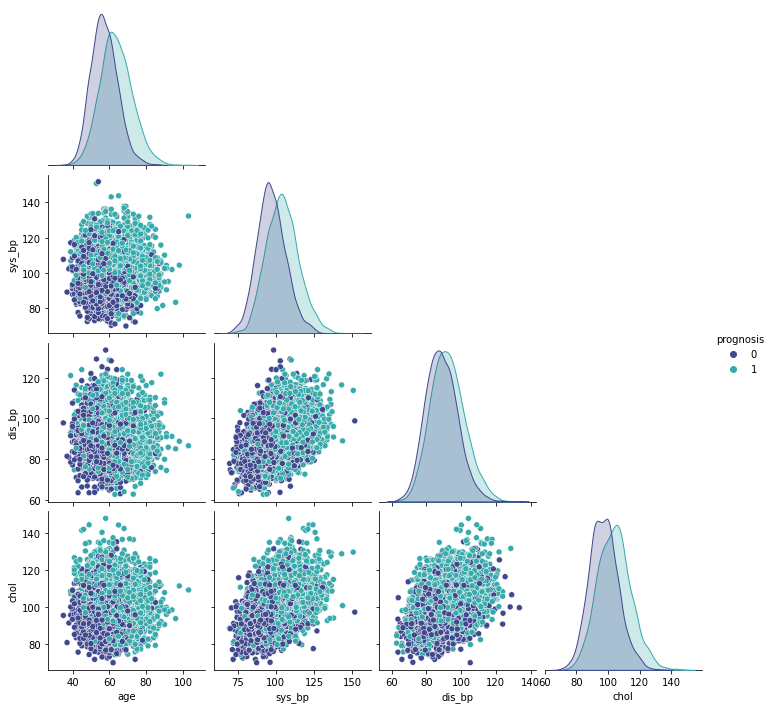

In [20]:
sns.pairplot(Dibetic_retinopathy,palette="mako",hue="prognosis",corner=True)
plt.show()

### Corellation matrix visualization

<AxesSubplot:>

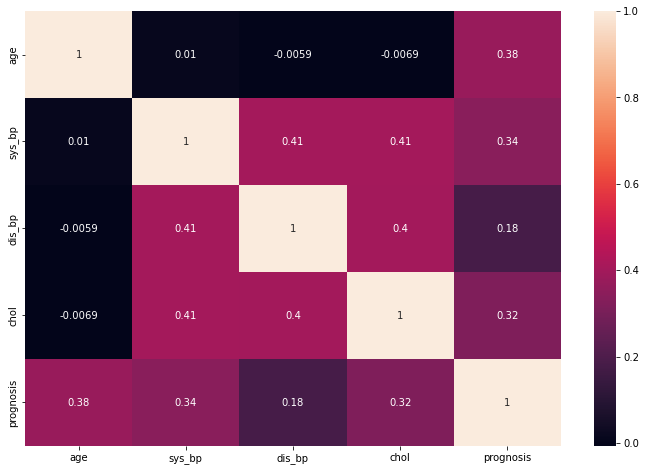

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(Dibetic_retinopathy.corr(),annot=True)

### Looking at indivisual relationship

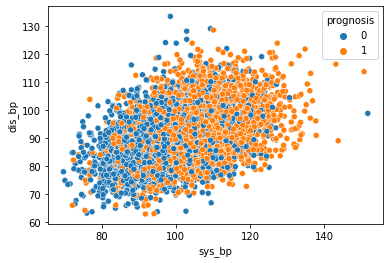

In [22]:
sns.scatterplot(x=Dibetic_retinopathy["sys_bp"],y=Dibetic_retinopathy["dis_bp"],hue=Dibetic_retinopathy["prognosis"])
plt.show()

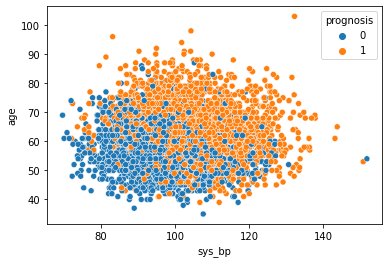

In [23]:
sns.scatterplot(x=Dibetic_retinopathy["sys_bp"],y=Dibetic_retinopathy["age"],hue=Dibetic_retinopathy["prognosis"])
plt.show()

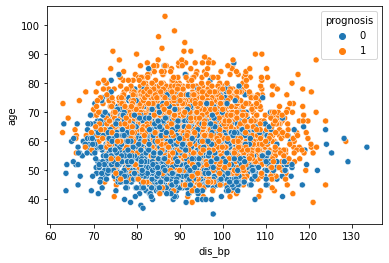

In [24]:
sns.scatterplot(x=Dibetic_retinopathy["dis_bp"],y=Dibetic_retinopathy["age"],hue=Dibetic_retinopathy["prognosis"])
plt.show()

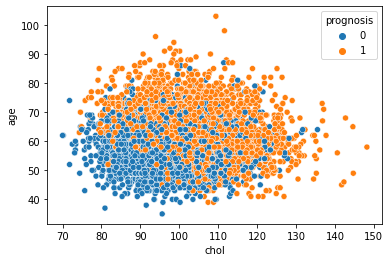

In [25]:
sns.scatterplot(x=Dibetic_retinopathy["chol"],y=Dibetic_retinopathy["age"],hue=Dibetic_retinopathy["prognosis"])
plt.show()

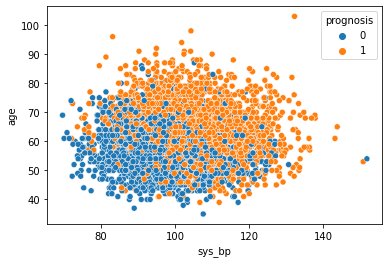

In [26]:
sns.scatterplot(x=Dibetic_retinopathy["sys_bp"],y=Dibetic_retinopathy["age"],hue=Dibetic_retinopathy["prognosis"])
plt.show()

<Figure size 2880x3600 with 0 Axes>

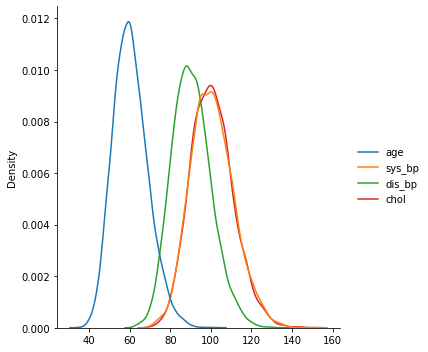

In [27]:
plt.figure(figsize=(40,50))
sns.displot(data=Dibetic_retinopathy.iloc[:,0:4],kind='kde')
plt.show()

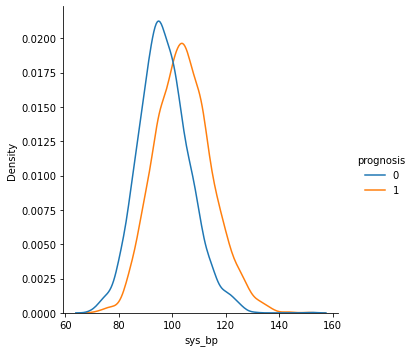

In [28]:
sns.displot(x=Dibetic_retinopathy["sys_bp"],hue=Dibetic_retinopathy["prognosis"],kind='kde')

We See Normalize Distribution for age,systolic blood pressure,diasystolic blood pressure and cholestrol

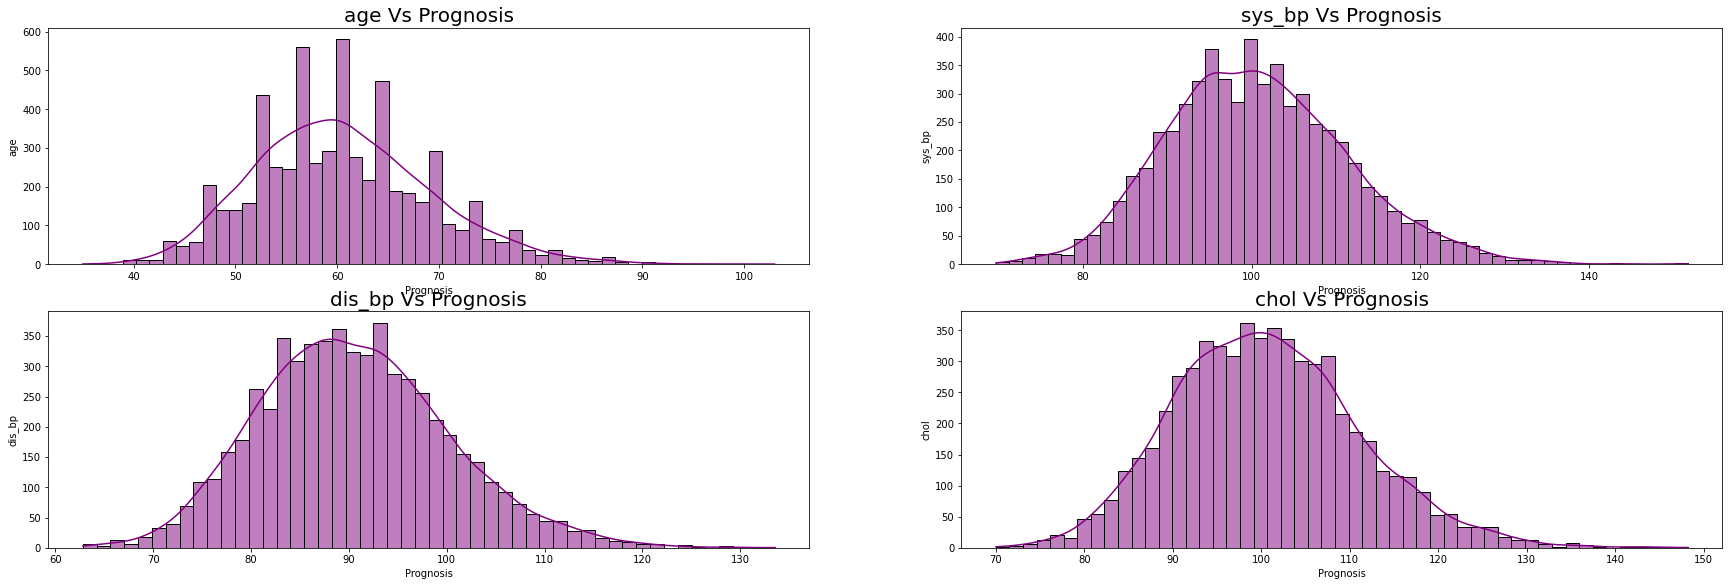

In [29]:
index=1
plt.figure(figsize=(30,20))
for features in Dibetic_retinopathy.iloc[:,0:4]:
    plt.subplot(4,2,index)
    sns.histplot(data=Dibetic_retinopathy,x=Dibetic_retinopathy[features],color="purple",kde=True)
    index+=1
    plt.title(features + " Vs Prognosis",fontsize=20)
    plt.xlabel("Prognosis",fontsize='10')
    plt.xticks(fontweight='10')
    plt.ylabel(features,fontsize='10')
        
 
    

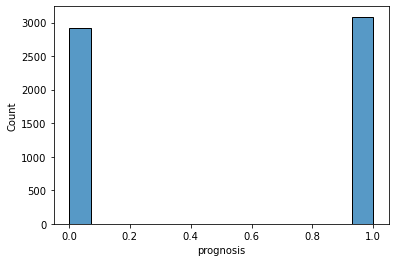

In [30]:
sns.histplot(Dibetic_retinopathy["prognosis"])
plt.show()

## Outlier Detection 

####  There re few techniques to find the ouliers
#### 1.Box-plot
#### 2.Z-score
#### 3.DBSCAN
#### 4.Isolation Forest


### 1. Box plot


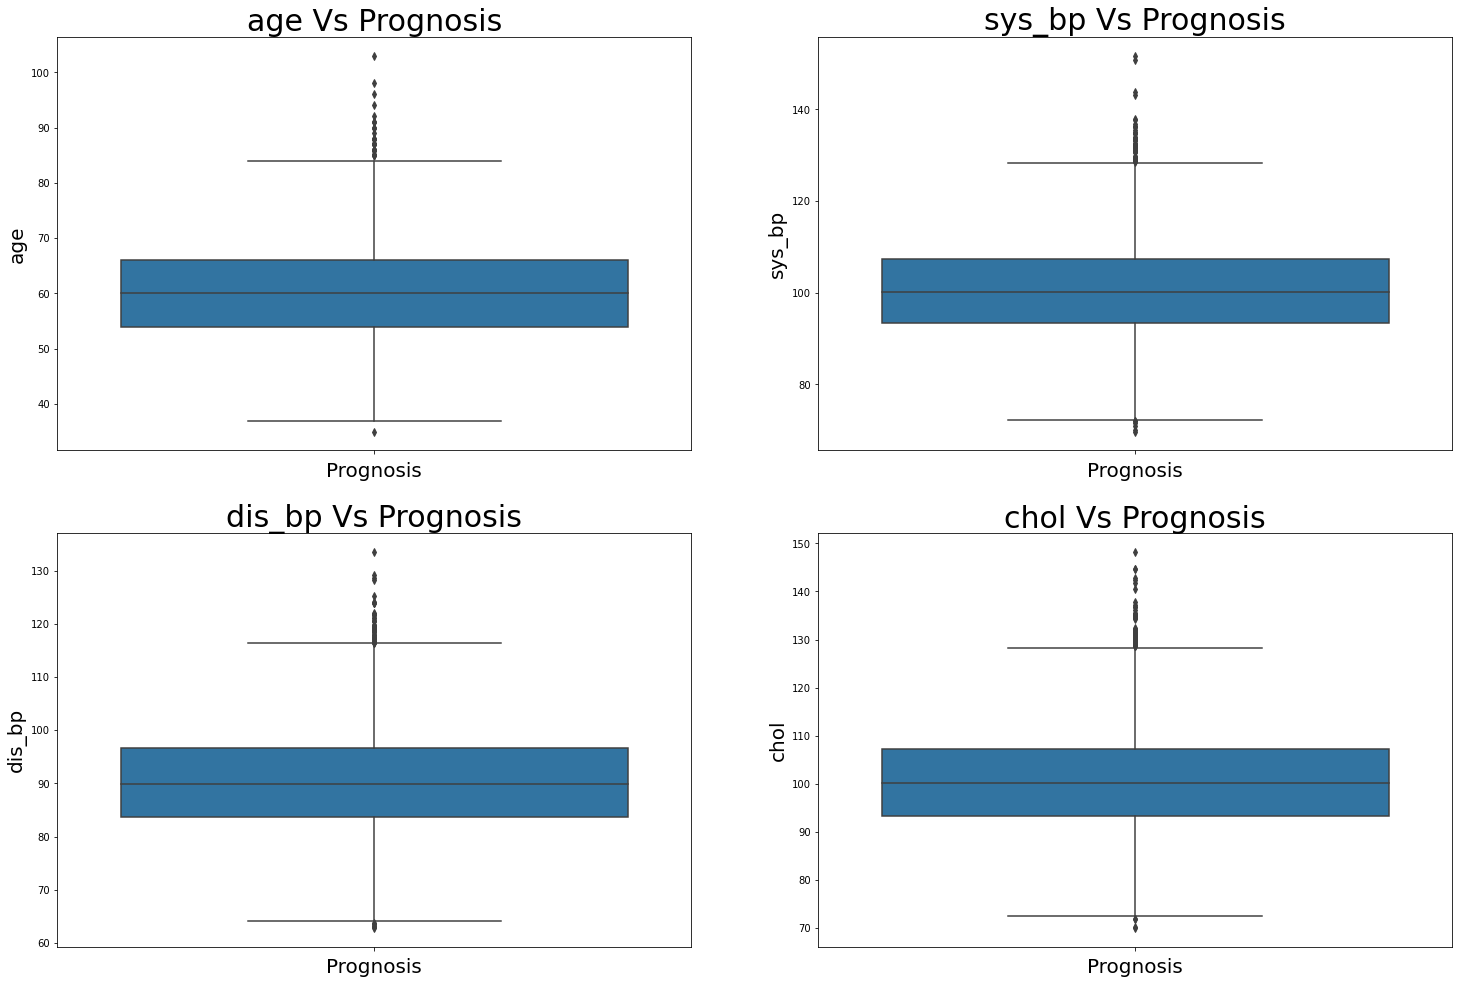

In [31]:
index = 0
plt.figure(figsize=(25,35))
for feature in Dibetic_retinopathy.iloc[:,0:4]:
    if feature != "prognosis":
        index += 1
        plt.subplot(4, 2, index)
        sns.boxplot( y=Dibetic_retinopathy[feature])
        plt.title((feature + " Vs Prognosis"),fontsize=30)
        plt.xlabel("Prognosis",fontsize='20')
        plt.xticks(fontweight='20')
        plt.ylabel(feature,fontsize='20')
        
 

#### 1 Age VS prognosis
#####             We can observe maximum age 85 and minimum 35 any records beyond these points are outliers
##### 2 Systolic blood pressure vs prognosis
#####             Records with systolic blood pressure above 125 and below than 40 are consider to outliers
##### 3 Diasystolic blood pressure vs prognosis
#####             Records with blood pressure above 115 and below 65 are ouliers
##### 4 Cholestrol vs prognosis
#####             Records with cholestrol higher than 130 and below 75 are ouliers 

###   If we see that these all records are very near the normal range people with high blood pressure and high cholestrol will have always more reading that normal range 

## still we will see which are these records

# Isolation Forest 

In [32]:
from sklearn.ensemble import IsolationForest
model= IsolationForest(random_state=10,contamination=.01,n_estimators=100)
model.fit(Dibetic_retinopathy) # fitting on the data 

IsolationForest(contamination=0.01, random_state=10)

In [33]:
outliers = model.predict(Dibetic_retinopathy) 

In [34]:
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
D_cluster=Dibetic_retinopathy.copy()

In [36]:
D_cluster['cluster_id'] = outliers # adding the column to the orignal data which will show the anamoly and the normal data
D_cluster

,age,sys_bp,dis_bp,chol,prognosis,cluster_id
0,77.0,85.3,80.0,80.0,1,1
1,64.0,99.4,84.9,110.4,1,1
2,69.0,111.3,109.9,100.8,1,1
3,83.0,95.1,79.7,87.1,1,1
4,78.0,109.2,90.7,92.5,1,1
...,...,...,...,...,...,...
5995,50.0,94.9,86.6,107.6,0,1
5996,63.0,100.0,93.5,105.0,1,1
5997,56.0,98.4,102.7,120.9,1,1
5998,63.0,106.8,88.1,106.1,1,1


In [37]:
Outlier_data=D_cluster[D_cluster["cluster_id"]==-1]

In [38]:
Outlier_data.shape

(60, 6)

### We have 60 outliers in our data

In [39]:
Outlier_data

,age,sys_bp,dis_bp,chol,prognosis,cluster_id
20,42.0,113.8,116.3,117.9,1,-1
88,51.0,112.2,116.1,118.3,0,-1
258,48.0,118.1,113.8,118.1,0,-1
334,41.0,115.6,113.9,112.9,0,-1
414,77.0,77.1,70.6,79.1,1,-1
427,41.0,95.5,74.8,121.5,1,-1
470,45.0,87.1,66.4,79.1,0,-1
485,41.0,118.5,108.4,126.9,1,-1
589,39.0,106.7,121.0,107.4,1,-1
819,60.0,110.1,128.6,131.9,1,-1


outliers_0value=Outlier_data[Outlier_data["prognosis"]==0]

outliers_0value.describe()

outliers_1value=Outlier_data[Outlier_data["prognosis"]==1]

outliers_1value

Outliers=outliers_1value[(outliers_1value["sys_bp"]<90)&(outliers_1value["prognosis"]==1) ]

Outliers

In [40]:
Dibetic_retinopathy.count()

age          6000
sys_bp       6000
dis_bp       6000
chol         6000
prognosis    6000
dtype: int64

### Almost 40 records which has retanopathy, after observing the values ,those values are acceptable 

# Standardise the data set 

In [41]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scale =StandardScaler()
Dibetic_retinopathy_std = scale.fit_transform(Dibetic_retinopathy.iloc[:,0:4])
Dibetic_retinopathy_std

array([[ 1.92875677, -1.44298204, -1.08891912, -1.97716608],
       [ 0.41233157, -0.12133243, -0.58102774,  0.9365954 ],
       [ 0.99557203,  0.99410234,  2.01025482,  0.0164602 ],
       ...,
       [-0.52085318, -0.21506645,  1.26396544,  1.94299328],
       [ 0.29568347,  0.57229927, -0.24934357,  0.52445151],
       [ 0.29568347, -0.35566747, -0.37372514,  0.76407005]])

# Train test Split

In [42]:
X=Dibetic_retinopathy_std
Y=Dibetic_retinopathy.iloc[:,4]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   Y, 
                                                    test_size = 0.30, random_state = 10)

# Model Building

## 1. Logistic Regression

## 2. Decision Tree

## 3. Random Forest

## 4. KNN

## 5. Naive Bayes Classifier -GaussianNB

## 6. Adaboost

## 7. XgBoost

## 8. Support Vector Machine

In [43]:
Algorithms_score = pd.DataFrame( columns = ['Classifier',
                               'Training_Acc',
                               'Testing_Acc',
                               'Overall_Acc',
                               'Overall_Precision',
                               'Overall_Recall','Overall_f1_score'],index=None) 

# 1. Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate,cross_val_score

### Using Training Data

In [45]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
pred = lgr.predict(X_train)
lgr_train_acc = accuracy_score(y_train, pred)*100
lgr_train_acc

74.45238095238095

### Using Testing Data

In [46]:
test_pred=lgr.predict(X_test)
lgr_test_acc=accuracy_score(y_test,test_pred)*100
print("\033[1mTesting accuracy of the model is-" ,lgr_test_acc)
## Confusion matrix on testing 
lgr_cm=confusion_matrix(y_test,test_pred)
print("\nConfusion Matrix-\n\n",lgr_cm)

Testing accuracy of the model is- 74.66666666666667

Confusion Matrix-

 [[637 233]
 [223 707]]


In [47]:
from sklearn.metrics import classification_report
print("\033[1mClassification Report\n")
print(classification_report(y_test, test_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       870
           1       0.75      0.76      0.76       930

    accuracy                           0.75      1800
   macro avg       0.75      0.75      0.75      1800
weighted avg       0.75      0.75      0.75      1800



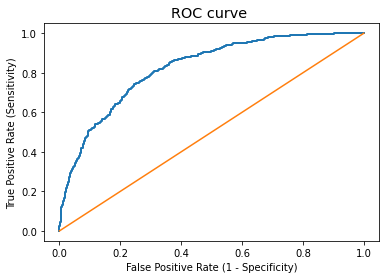

In [48]:
from sklearn.metrics import roc_curve
y_pred_proba =lgr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1] )
plt.rcParams['font.size'] = 12
plt.title('ROC curve ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.8238215300951676

### Predicting Threshold


In [50]:
pred_threshold = pd.DataFrame( columns = ['Threshold',
                               'Correct_Predictions',
                               'FP',
                               'FN',
                               'Precision',
                               'Recall'],index=None) 
from sklearn.preprocessing import binarize
import numpy as np

for i in range(1,10):
    
    cm1=0
    
    y_pred1 = lgr.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    cm1 = confusion_matrix(y_test, y_pred2)

    TP = cm1[0,0]
    TN = cm1[1,1]
    FP = cm1[0,1]
    FN = cm1[1,0]
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
   
    pred_threshold = pred_threshold.append({'Threshold':i,
                               'Correct_Predictions':TP+FP,
                               'FP':FP,
                               'FN':FN,
                               'Precision':TP/(TP+FP),
                               'Recall':TP/(TP+FN)}, ignore_index=True)  
    



In [51]:
pred_threshold 

,Threshold,Correct_Predictions,FP,FN,Precision,Recall
0,1.0,870.0,771.0,2.0,0.113793,0.980198
1,2.0,870.0,598.0,20.0,0.312644,0.931507
2,3.0,870.0,443.0,81.0,0.490805,0.840551
3,4.0,870.0,323.0,131.0,0.628736,0.806785
4,5.0,870.0,233.0,223.0,0.732184,0.740698
5,6.0,870.0,172.0,320.0,0.802299,0.685658
6,7.0,870.0,108.0,425.0,0.875862,0.641955
7,8.0,870.0,56.0,579.0,0.935632,0.58435
8,9.0,870.0,20.0,741.0,0.977011,0.534255


lrt = LogisticRegressionWithThreshold()
lrt.fit(X_train, y_train,0.4)

threshold, max_accuracy, df_accuracy = lrt.threshold_from_optimal_accuracy(X_train, y_train)
y_pred = lrt.predict(X_train, threshold)

threshold, max_accuracy

### Final Model With Changed Threshold

In [52]:
flgr=LogisticRegression()
flgr.fit(X_train,y_train)
flgr_train_pred=flgr.predict(X_train)
flgr_train_acc=accuracy_score(flgr_train_pred,y_train)
y_test_pred=(flgr.predict_proba(X_test)[:,1]>0.4).astype(bool)
print("\033[1mClassification Report \033[1m")
print(classification_report(y_test,y_test_pred))
accuracy=accuracy_score(y_test,y_test_pred)
print("Accuracy-",accuracy)

Con_matrix=confusion_matrix(y_test,y_test_pred)
print("\nConfusion matric-\n",Con_matrix)

# Cross validation Score for logistic regression 
flgr_crossvals=cross_validate(flgr,X,Y,scoring=["accuracy","precision","recall","f1"],cv=10)
flgr_crossval_score=pd.DataFrame(flgr_crossvals)
flgr_crossval_score

Classification Report 
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       870
           1       0.71      0.86      0.78       930

    accuracy                           0.75      1800
   macro avg       0.76      0.74      0.74      1800
weighted avg       0.76      0.75      0.74      1800

Accuracy- 0.7477777777777778

Confusion matric-
 [[547 323]
 [131 799]]


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.004795,0.002097,0.723333,0.744027,0.705502,0.724252
1,0.004330,0.001768,0.753333,0.755556,0.770227,0.762821
2,0.004101,0.001729,0.778333,0.780255,0.792880,0.786517
3,0.004023,0.001758,0.743333,0.766323,0.721683,0.743333
4,0.003898,0.001751,0.716667,0.717868,0.741100,0.729299
5,0.006627,0.001715,0.750000,0.767677,0.737864,0.752475
6,0.003803,0.001787,0.743333,0.768166,0.718447,0.742475
7,0.004105,0.001710,0.740000,0.758503,0.724026,0.740864
8,0.004698,0.001839,0.753333,0.759740,0.759740,0.759740
9,0.003993,0.001882,0.740000,0.748366,0.743506,0.745928


In [53]:
m_scores=(flgr_crossval_score.mean()*100)

In [54]:
m_scores

fit_time           0.443740
score_time         0.180357
test_accuracy     74.416667
test_precision    75.664815
test_recall       74.149750
test_f1           74.877051
dtype: float64

In [55]:
m_scores[2]

74.41666666666666

In [56]:
Algorithms_score = Algorithms_score.append( {'Classifier':'Logistic Regression',
                               'Training_Acc':(flgr_train_acc*100),
                               'Testing_Acc':(accuracy*100),
                               'Overall_Acc':m_scores[2],
                               'Overall_Precision':m_scores[3],
                               'Overall_Recall':m_scores[4],'Overall_f1_score':m_scores[5]},ignore_index=True) 

In [57]:
Algorithms_score

,Classifier,Training_Acc,Testing_Acc,Overall_Acc,Overall_Precision,Overall_Recall,Overall_f1_score
0,Logistic Regression,74.452381,74.777778,74.416667,75.664815,74.14975,74.877051


## ---------------------------------------------------------------------------------------------------------

## ---------------------------------------------------------------------------------------------------------

# 2. Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

### Grid Search CV

In [59]:
dtr=DecisionTreeClassifier()
params=[{'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6]}]
gs_dtree=GridSearchCV(dtr,param_grid=params,scoring='accuracy',cv=10)
y_train1=y_train.values.reshape(-1,1)
gs_dtree.fit(X_train,y_train1)
gs_dtree.best_params_

{'criterion': 'gini', 'max_depth': 6}

##  building  the model with Criterion='gini',Max_depth=5

In [60]:
final_dtree=DecisionTreeClassifier(criterion='gini',max_depth=5)
final_dtree.fit(X_train,y_train)
pred_train_fdt=final_dtree.predict(X_train)
fdtree_train_acc=accuracy_score(pred_train_fdt,y_train)

print("\033[1mTraining Accuracy of Decision tree model \033[1m:",fdtree_train_acc)
print("\n")
pred_fdt=final_dtree.predict(X_test)
fdtree_test_acc=accuracy_score(y_test,pred_fdt)
print("\033[1mTestin Accuracy of Decision tree model \033[1m:",fdtree_test_acc)
print("\n")
print(classification_report(y_test,pred_fdt))

# Cross Validation Score
DT_crossvals=cross_validate(final_dtree,X,Y,scoring=["accuracy","precision","recall","f1"],cv=10)
DT_crossval_score=pd.DataFrame(DT_crossvals)
DT_crossval_score

Training Accuracy of Decision tree model : 0.7602380952380953


Testin Accuracy of Decision tree model : 0.7233333333333334


              precision    recall  f1-score   support

           0       0.73      0.68      0.70       870
           1       0.72      0.77      0.74       930

    accuracy                           0.72      1800
   macro avg       0.72      0.72      0.72      1800
weighted avg       0.72      0.72      0.72      1800



,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.005980,0.001949,0.696667,0.674931,0.792880,0.729167
1,0.006517,0.001958,0.723333,0.739130,0.715210,0.726974
2,0.005843,0.002437,0.765000,0.760870,0.792880,0.776545
3,0.005767,0.001968,0.743333,0.768166,0.718447,0.742475
4,0.005713,0.001746,0.703333,0.725086,0.682848,0.703333
5,0.005680,0.001718,0.728333,0.750000,0.708738,0.728785
6,0.005563,0.001728,0.706667,0.712460,0.721683,0.717042
7,0.005546,0.002024,0.716667,0.710366,0.756494,0.732704
8,0.005629,0.001840,0.736667,0.725904,0.782468,0.753125
9,0.005685,0.002042,0.735000,0.770909,0.688312,0.727273


In [61]:
m_scores=(DT_crossval_score.mean()*100)

In [62]:
m_scores

fit_time           0.579231
score_time         0.194101
test_accuracy     72.550000
test_precision    73.378218
test_recall       73.599588
test_f1           73.374231
dtype: float64

In [63]:
Algorithms_score = Algorithms_score.append( {'Classifier':'Decision Tree',
                               'Training_Acc':(fdtree_train_acc*100),
                               'Testing_Acc':(fdtree_test_acc*100),
                               'Overall_Acc':m_scores[2],
                               'Overall_Precision':m_scores[3],
                               'Overall_Recall':m_scores[4],'Overall_f1_score':m_scores[5]},ignore_index=True) 

In [64]:
Algorithms_score


,Classifier,Training_Acc,Testing_Acc,Overall_Acc,Overall_Precision,Overall_Recall,Overall_f1_score
0,Logistic Regression,74.452381,74.777778,74.416667,75.664815,74.14975,74.877051
1,Decision Tree,76.02381,72.333333,72.55,73.378218,73.599588,73.374231


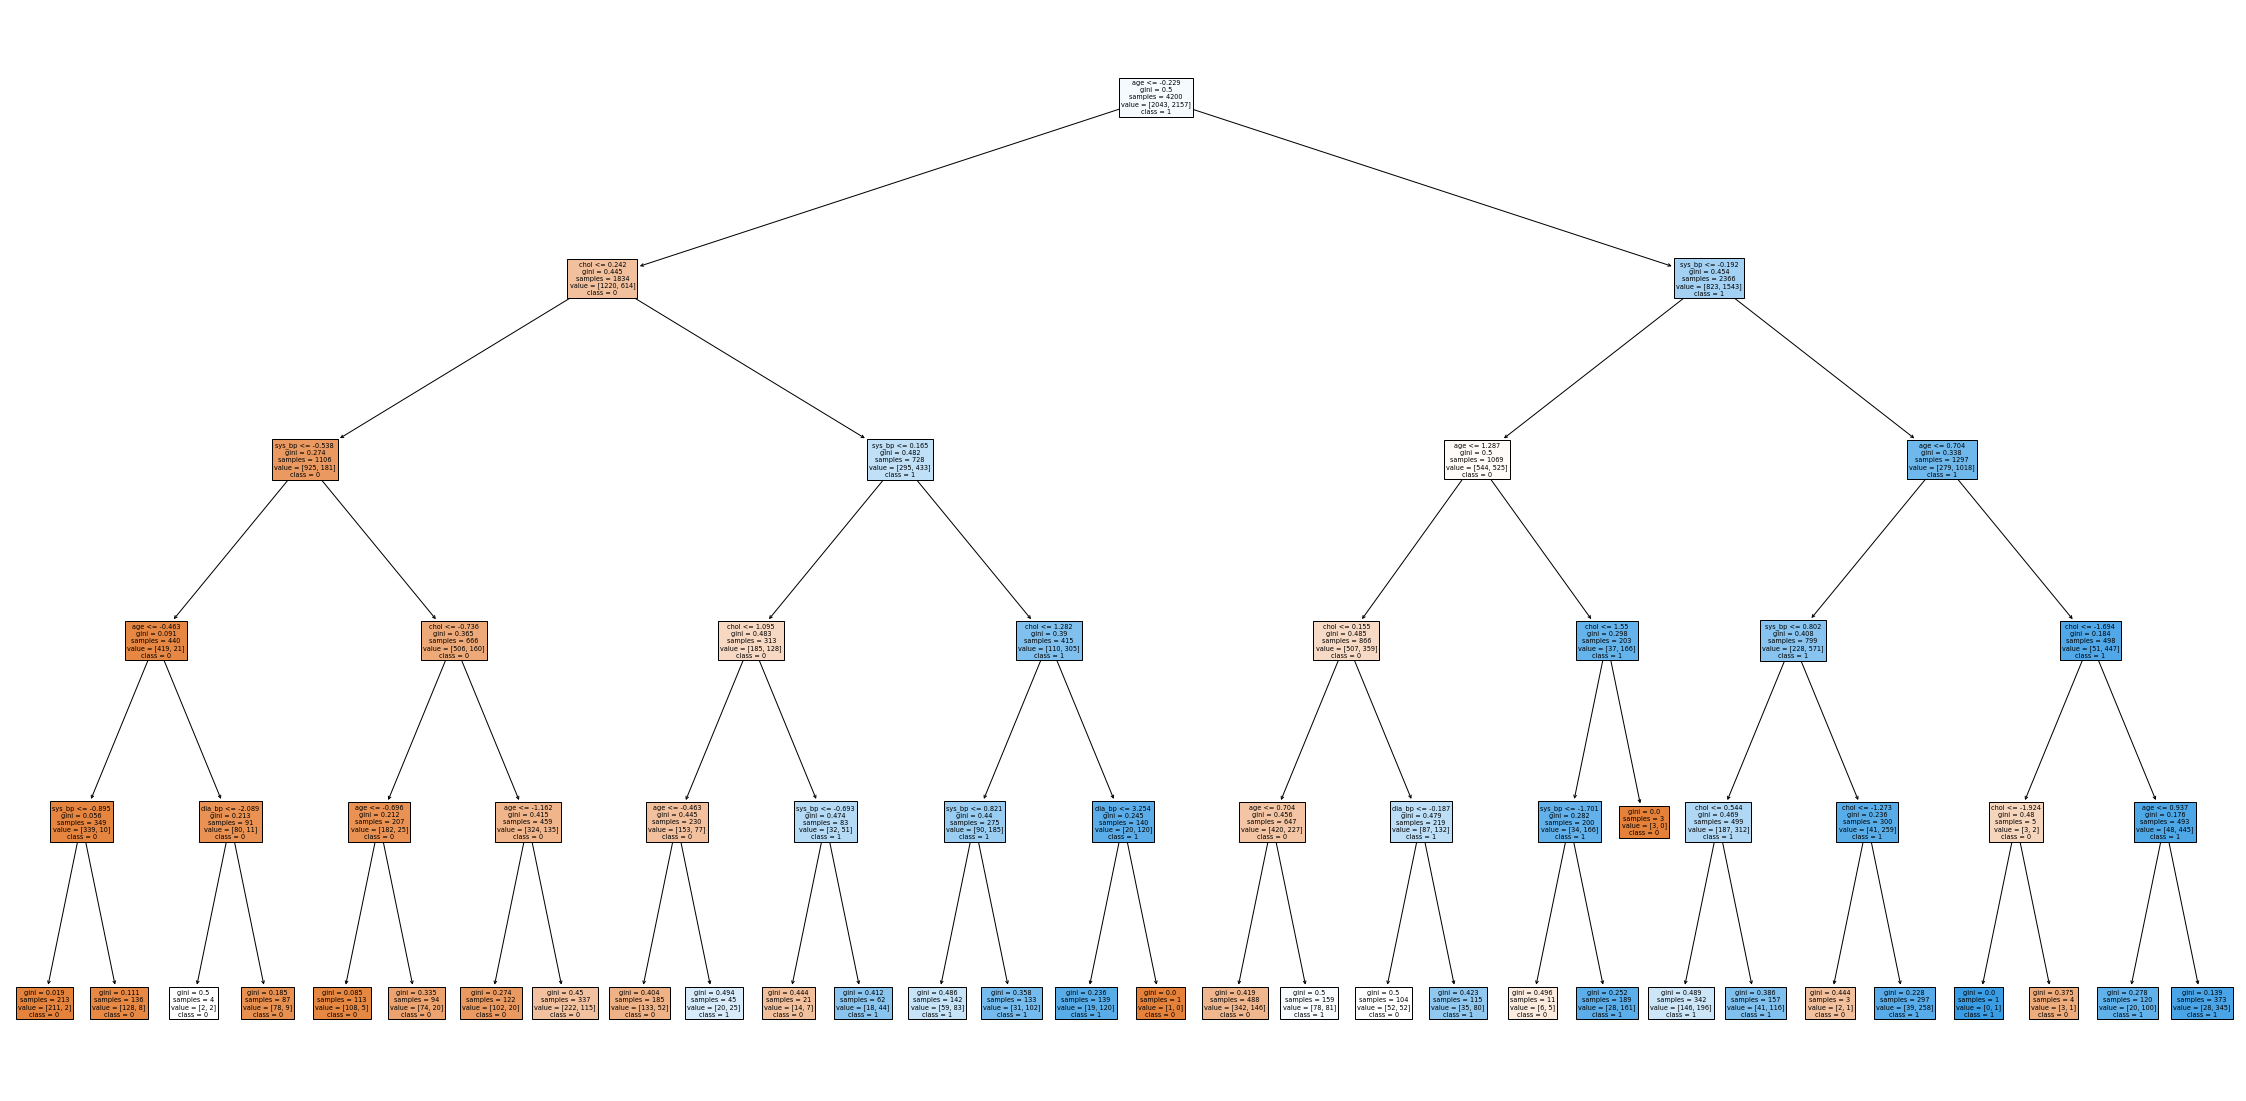

In [65]:
fname=['age','sys_bp','dia_bp','chol']
cn=['0','1']
plt.figure(figsize=(40,20))
tree.plot_tree(final_dtree,feature_names=fname,class_names=cn,filled=True)
plt.show()

## ---------------------------------------------------------------------------------------------------------

## ---------------------------------------------------------------------------------------------------------

##  3.Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=3)
rf.fit(X_train,y_train)
rf_train_pred=rf.predict(X_train)
rf_train_acc=accuracy_score(y_train,rf_train_pred)
print("\033[1mAccuracy for Random forest -\033[1m ",rf_train_acc)
print("\n",classification_report(y_train,rf_train_pred))

rf_test_pred=rf.predict(X_test)
rf_test_acc=accuracy_score(y_test,rf_test_pred)
print("\033[1mAccuracy for Random forest -\033[1m ",rf_test_acc)
print("\n",classification_report(y_test,rf_test_pred))



Accuracy for Random forest -  0.7590476190476191

               precision    recall  f1-score   support

           0       0.76      0.75      0.75      2043
           1       0.76      0.77      0.77      2157

    accuracy                           0.76      4200
   macro avg       0.76      0.76      0.76      4200
weighted avg       0.76      0.76      0.76      4200

Accuracy for Random forest -  0.7327777777777778

               precision    recall  f1-score   support

           0       0.73      0.71      0.72       870
           1       0.74      0.75      0.74       930

    accuracy                           0.73      1800
   macro avg       0.73      0.73      0.73      1800
weighted avg       0.73      0.73      0.73      1800



### Cross-validation for Random forest classifier

In [67]:
rf_cross_model=RandomForestClassifier(n_estimators=100,criterion='gini',
                                     max_depth=4,bootstrap=True,n_jobs=1,
                                     random_state=0,oob_score=True)
rf_cross_score=cross_validate(rf_cross_model,X,Y,scoring=["accuracy","precision","recall","f1"],cv=10)
rf_cross_score=pd.DataFrame(rf_cross_score)

rf_cross_score

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.313274,0.030454,0.710000,0.711599,0.734628,0.722930
1,0.339739,0.009355,0.733333,0.732087,0.760518,0.746032
2,0.291093,0.009079,0.743333,0.741433,0.770227,0.755556
3,0.283283,0.008964,0.746667,0.749206,0.763754,0.756410
4,0.279969,0.008911,0.718333,0.721519,0.737864,0.729600
5,0.279351,0.008910,0.751667,0.751572,0.773463,0.762360
6,0.279209,0.008832,0.745000,0.756579,0.744337,0.750408
7,0.278881,0.008908,0.726667,0.720859,0.762987,0.741325
8,0.279414,0.008906,0.760000,0.748485,0.801948,0.774295
9,0.279575,0.008814,0.735000,0.741100,0.743506,0.742301


In [68]:
m_scores=rf_cross_score.mean()*100
m_scores

fit_time          29.037881
score_time         1.111329
test_accuracy     73.700000
test_precision    73.744397
test_recall       75.932312
test_f1           74.812168
dtype: float64

In [69]:
Algorithms_score = Algorithms_score.append( {'Classifier':'Random Forest',
                               'Training_Acc':(rf_train_acc*100),
                               'Testing_Acc':(rf_test_acc*100),
                               'Overall_Acc':m_scores[2],
                               'Overall_Precision':m_scores[3],
                               'Overall_Recall':m_scores[4],'Overall_f1_score':m_scores[5]},ignore_index=True) 

In [70]:
Algorithms_score 

,Classifier,Training_Acc,Testing_Acc,Overall_Acc,Overall_Precision,Overall_Recall,Overall_f1_score
0,Logistic Regression,74.452381,74.777778,74.416667,75.664815,74.14975,74.877051
1,Decision Tree,76.02381,72.333333,72.55,73.378218,73.599588,73.374231
2,Random Forest,75.904762,73.277778,73.7,73.744397,75.932312,74.812168


## 4.KNN Algorithm 

In [71]:
from sklearn.neighbors import KNeighborsClassifier

estimator_knn=KNeighborsClassifier(algorithm='auto')


parameters_knn={'n_neighbors':(5,7,9,11,13,15,17,19),
                'weights':('uniform','distance'),
           'metric':('minkowski', 'chebyshev')
          
           }

gs_KNN=GridSearchCV(estimator=estimator_knn,param_grid=parameters_knn,
                    scoring='accuracy',
                    n_jobs=-1,
                     cv=5)

gs_results=gs_KNN.fit(X_train,y_train)

print("\033[1m",gs_KNN.best_params_)

print("\n\033[1m Best Score:-",gs_KNN.best_score_)


 {'metric': 'minkowski', 'n_neighbors': 19, 'weights': 'distance'}

 Best Score:- 0.7466666666666667


### Build Model with Best Parameter- {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}

In [72]:
KNN_Retno_model=KNeighborsClassifier(n_neighbors=15,algorithm='auto',weights='uniform',metric='minkowski')
KNN_Retno_model.fit(X_train,y_train)

# Predicting Training Data

Knn_train_predict=KNN_Retno_model.predict(X_train)
KNN_acc_train=accuracy_score(y_train,Knn_train_predict)
print("\n\033[1mTraining Accuracy:-",KNN_acc_train)
print("\nConfusion Metrix\n\n",confusion_matrix(y_train,Knn_train_predict))

# Predicting Testing Data
KNN_test_predict=KNN_Retno_model.predict(X_test)
Knn_acc_test=accuracy_score(y_test,KNN_test_predict)
print("\nTesting Accuracy:-",Knn_acc_test)
print("\nConfusion Metrix\n\n",confusion_matrix(y_test,KNN_test_predict))

# Cross VAlidation score
KNN_crossvals=cross_validate(KNN_Retno_model,X,Y,cv=10,scoring=["accuracy","precision","recall","f1"])
KNN_cross_score=pd.DataFrame(KNN_crossvals)
print("\n\033[1m Cross Validation Score for KNN -")
KNN_cross_score




Training Accuracy:- 0.7723809523809524

Confusion Metrix

 [[1553  490]
 [ 466 1691]]

Testing Accuracy:- 0.73

Confusion Metrix

 [[610 260]
 [226 704]]

 Cross Validation Score for KNN -


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.002901,0.015682,0.708333,0.708075,0.737864,0.722662
1,0.002114,0.016616,0.738333,0.727545,0.786408,0.755832
2,0.002206,0.015537,0.753333,0.746177,0.789644,0.767296
3,0.002092,0.015778,0.746667,0.754045,0.754045,0.754045
4,0.003264,0.016215,0.740000,0.750820,0.741100,0.745928
5,0.002160,0.015837,0.741667,0.748387,0.750809,0.749596
6,0.002217,0.015590,0.736667,0.755932,0.721683,0.738411
7,0.002110,0.015324,0.723333,0.729032,0.733766,0.731392
8,0.002109,0.015342,0.753333,0.748447,0.782468,0.765079
9,0.002069,0.015504,0.738333,0.742765,0.750000,0.746365


In [73]:
m_scores=KNN_cross_score.mean()*100

In [74]:
m_scores

fit_time           0.232422
score_time         1.574249
test_accuracy     73.800000
test_precision    74.112258
test_recall       75.477872
test_f1           74.766065
dtype: float64

In [75]:
Algorithms_score = Algorithms_score.append( {'Classifier':'KNN',
                               'Training_Acc':(KNN_acc_train*100),
                               'Testing_Acc':(Knn_acc_test*100),
                               'Overall_Acc':m_scores[2],
                               'Overall_Precision':m_scores[3],
                               'Overall_Recall':m_scores[4],'Overall_f1_score':m_scores[5]},ignore_index=True) 

In [76]:
Algorithms_score

,Classifier,Training_Acc,Testing_Acc,Overall_Acc,Overall_Precision,Overall_Recall,Overall_f1_score
0,Logistic Regression,74.452381,74.777778,74.416667,75.664815,74.14975,74.877051
1,Decision Tree,76.02381,72.333333,72.55,73.378218,73.599588,73.374231
2,Random Forest,75.904762,73.277778,73.7,73.744397,75.932312,74.812168
3,KNN,77.238095,73.0,73.8,74.112258,75.477872,74.766065


##  5. Naive Bayes Classifier -GaussianNB


In [77]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train, y_train)
gb_train_pred=gb.predict(X_train)
gb_train_acc=accuracy_score(y_train,gb_train_pred,)
print("\n\033[1mTraining Accuracy:-",gb_train_acc)
print("\nConfusion Metrix for training:- \n\n",confusion_matrix(y_train,gb_train_pred))


gb_test_pred=gb.predict(X_test)
gb_test_acc=accuracy_score(y_test,gb_test_pred)
print("\n\033[1mTraining Accuracy:-",gb_test_acc)
print("\nConfusion Metrix for testing:-\n\n",confusion_matrix(y_test,gb_test_pred))

# Cross Validation Score
gb_crossvals=cross_validate(gb,X,Y,cv=10,scoring=["accuracy","precision","recall","f1"])
gb_cross_val=pd.DataFrame(gb_crossvals)
print("\n\033[1m Cross Validation Score for GaussianNB -")
gb_cross_val


Training Accuracy:- 0.735

Confusion Metrix for training:- 

 [[1566  477]
 [ 636 1521]]

Training Accuracy:- 0.7277777777777777

Confusion Metrix for testing:-

 [[644 226]
 [264 666]]

 Cross Validation Score for GaussianNB -


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.001535,0.001902,0.706667,0.734982,0.673139,0.702703
1,0.001316,0.001818,0.741667,0.758389,0.731392,0.744646
2,0.001280,0.001838,0.748333,0.765101,0.737864,0.751236
3,0.001530,0.002287,0.736667,0.774545,0.689320,0.729452
4,0.001282,0.001724,0.710000,0.741935,0.669903,0.704082
5,0.001174,0.001688,0.738333,0.771429,0.699029,0.733447
6,0.001149,0.001702,0.735000,0.758621,0.711974,0.734558
7,0.001147,0.001683,0.730000,0.755245,0.701299,0.727273
8,0.001139,0.001683,0.741667,0.764706,0.717532,0.740369
9,0.001143,0.001691,0.736667,0.756849,0.717532,0.736667


In [78]:
m_scores=gb_cross_val.mean()*100
m_scores

fit_time           0.126960
score_time         0.180159
test_accuracy     73.250000
test_precision    75.818024
test_recall       70.489850
test_f1           73.044298
dtype: float64

In [79]:
Algorithms_score = Algorithms_score.append( {'Classifier':'Naive Bayes Gaussian',
                               'Training_Acc':(gb_train_acc*100),
                               'Testing_Acc':(gb_train_acc*100),
                               'Overall_Acc':m_scores[2],
                               'Overall_Precision':m_scores[3],
                               'Overall_Recall':m_scores[4],'Overall_f1_score':m_scores[5]},ignore_index=True) 

In [80]:
Algorithms_score 

,Classifier,Training_Acc,Testing_Acc,Overall_Acc,Overall_Precision,Overall_Recall,Overall_f1_score
0,Logistic Regression,74.452381,74.777778,74.416667,75.664815,74.14975,74.877051
1,Decision Tree,76.02381,72.333333,72.55,73.378218,73.599588,73.374231
2,Random Forest,75.904762,73.277778,73.7,73.744397,75.932312,74.812168
3,KNN,77.238095,73.0,73.8,74.112258,75.477872,74.766065
4,Naive Bayes Gaussian,73.5,73.5,73.25,75.818024,70.48985,73.044298


## 6. Adaboost Classifire


In [81]:
from sklearn.ensemble import AdaBoostClassifier
adab= AdaBoostClassifier()
adab.fit(X_train,y_train)
adab_train_pred=adab.predict(X_train)
adab_train_acc=accuracy_score(y_train,adab_train_pred)
print("\n\033[1m Adaboost training Accuracy- ",adab_train_acc)
print("\nConfusion Metrix for training:- \n\n",confusion_matrix(y_train,adab_train_pred))



adab_test_pred=adab.predict(X_test)
adab_test_acc=accuracy_score(y_test,adab_test_pred)
print("\n\033[1m Adaboost testing Accuracy- ",adab_test_acc)
print("\nConfusion Metrix for testing:-\n\n",confusion_matrix(y_test,adab_test_pred))

# Cross Validation Score
# Cross Validation Score
adab_crossvals=cross_validate(adab,X,Y,cv=10,scoring=["accuracy","precision","recall","f1"])
adab_cross_val=pd.DataFrame(adab_crossvals)
print("\n\033[1m Cross Validation Score for AdaBoost -")
adab_cross_val


 Adaboost training Accuracy-  0.758095238095238

Confusion Metrix for training:- 

 [[1587  456]
 [ 560 1597]]

 Adaboost testing Accuracy-  0.7322222222222222

Confusion Metrix for testing:-

 [[640 230]
 [252 678]]

 Cross Validation Score for AdaBoost -


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.111359,0.006980,0.730000,0.749153,0.715210,0.731788
1,0.110892,0.006416,0.765000,0.765823,0.783172,0.774400
2,0.110390,0.006662,0.751667,0.759740,0.757282,0.758509
3,0.113947,0.006671,0.743333,0.757475,0.737864,0.747541
4,0.112581,0.006607,0.708333,0.718954,0.711974,0.715447
5,0.116537,0.007158,0.761667,0.790210,0.731392,0.759664
6,0.115490,0.006688,0.725000,0.751748,0.695793,0.722689
7,0.116822,0.006424,0.725000,0.740741,0.714286,0.727273
8,0.108919,0.006405,0.756667,0.761290,0.766234,0.763754
9,0.108809,0.006426,0.731667,0.747475,0.720779,0.733884


In [82]:
m_scores=adab_cross_val.mean()*100
m_scores

fit_time          11.257458
score_time         0.664372
test_accuracy     73.983333
test_precision    75.426088
test_recall       73.339848
test_f1           74.349491
dtype: float64

In [83]:
Algorithms_score = Algorithms_score.append( {'Classifier':'Adaboost Classifire',
                               'Training_Acc':(adab_train_acc*100),
                               'Testing_Acc':(adab_train_acc*100),
                               'Overall_Acc':m_scores[2],
                               'Overall_Precision':m_scores[3],
                               'Overall_Recall':m_scores[4],'Overall_f1_score':m_scores[5]},ignore_index=True) 

In [84]:
Algorithms_score

,Classifier,Training_Acc,Testing_Acc,Overall_Acc,Overall_Precision,Overall_Recall,Overall_f1_score
0,Logistic Regression,74.452381,74.777778,74.416667,75.664815,74.14975,74.877051
1,Decision Tree,76.02381,72.333333,72.55,73.378218,73.599588,73.374231
2,Random Forest,75.904762,73.277778,73.7,73.744397,75.932312,74.812168
3,KNN,77.238095,73.0,73.8,74.112258,75.477872,74.766065
4,Naive Bayes Gaussian,73.5,73.5,73.25,75.818024,70.48985,73.044298
5,Adaboost Classifire,75.809524,75.809524,73.983333,75.426088,73.339848,74.349491


## 7.Xgboost

In [85]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb_train_pred=xgb.predict(X_train)
xgb_train_acc=accuracy_score(y_train,xgb_train_pred)
print("\n\033[1m xgboost training Accuracy- ",xgb_train_acc)
print("\nConfusion Metrix for training:- \n\n",confusion_matrix(y_train,xgb_train_pred))



xgb_test_pred=xgb.predict(X_test)
xgb_test_acc=accuracy_score(y_test,xgb_test_pred)
print("\n\033[1m xgboost testing Accuracy- ",xgb_test_acc)
print("\nConfusion Metrix for testing:-\n\n",confusion_matrix(y_test,xgb_test_pred))

# Cross Validation Score
xgb_crossvals=cross_validate(xgb,X,Y,cv=10,scoring=["accuracy","precision","recall","f1"])
xgb_cross_val=pd.DataFrame(xgb_crossvals)
print("\n\033[1m Cross Validation Score for Xgboost -")
xgb_cross_val


 xgboost training Accuracy-  0.9347619047619048

Confusion Metrix for training:- 

 [[1910  133]
 [ 141 2016]]

 xgboost testing Accuracy-  0.7166666666666667

Confusion Metrix for testing:-

 [[604 266]
 [244 686]]

 Cross Validation Score for Xgboost -


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.270761,0.004797,0.705000,0.712903,0.715210,0.714055
1,0.268544,0.003786,0.723333,0.716012,0.766990,0.740625
2,0.256198,0.004430,0.735000,0.735849,0.757282,0.746411
3,0.258780,0.003393,0.728333,0.741722,0.724919,0.733224
4,0.245260,0.004865,0.728333,0.738562,0.731392,0.734959
5,0.247853,0.003370,0.741667,0.750000,0.747573,0.748784
6,0.267835,0.003832,0.718333,0.734899,0.708738,0.721582
7,0.270878,0.003197,0.715000,0.712074,0.746753,0.729002
8,0.261969,0.003407,0.716667,0.710366,0.756494,0.732704
9,0.260149,0.003415,0.713333,0.715190,0.733766,0.724359


In [86]:
m_scores=xgb_cross_val.mean()*100
m_scores

fit_time          26.082275
score_time         0.384924
test_accuracy     72.250000
test_precision    72.675777
test_recall       73.891165
test_f1           73.257059
dtype: float64

In [87]:
Algorithms_score = Algorithms_score.append( {'Classifier':'XGboost',
                               'Training_Acc':(xgb_train_acc*100),
                               'Testing_Acc':(xgb_train_acc*100),
                               'Overall_Acc':m_scores[2],
                               'Overall_Precision':m_scores[3],
                               'Overall_Recall':m_scores[4],'Overall_f1_score':m_scores[5]},ignore_index=True) 

In [88]:
Algorithms_score 

,Classifier,Training_Acc,Testing_Acc,Overall_Acc,Overall_Precision,Overall_Recall,Overall_f1_score
0,Logistic Regression,74.452381,74.777778,74.416667,75.664815,74.14975,74.877051
1,Decision Tree,76.02381,72.333333,72.55,73.378218,73.599588,73.374231
2,Random Forest,75.904762,73.277778,73.7,73.744397,75.932312,74.812168
3,KNN,77.238095,73.0,73.8,74.112258,75.477872,74.766065
4,Naive Bayes Gaussian,73.5,73.5,73.25,75.818024,70.48985,73.044298
5,Adaboost Classifire,75.809524,75.809524,73.983333,75.426088,73.339848,74.349491
6,XGboost,93.47619,93.47619,72.25,72.675777,73.891165,73.257059


## 8. Support Vector Machine(SVC)


In [89]:
from sklearn.svm import SVC

 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.755 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.751 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.729 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.735 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.742 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.715 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.671 total time=   5.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.652 total time=   6.7s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.680 total time=   5.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.704 total time=   6.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.727 total time=   2.4s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.754 total time=   2.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.768 total time=   2.8s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.724 total time=   2.3s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.750 total time=   2.9s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.744 total time=   0.8s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.764 total time=   0.8s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.757 total time=   0.8s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [90]:
# print best parameter after tuning
print("\n\033[1m ",grid.best_params_)


  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [101]:
## Model Building with best parameters 
svc=SVC(C=10,gamma=0.1,kernel='rbf')
svc.fit(X_train,y_train)
svc_train_pred=svc.predict(X_train)
svc_train_acc=accuracy_score(y_train,svc_train_pred)
print("\n\033[1m SVC training Accuracy- ",svc_train_acc)
print("\nConfusion Metrix for training:- \n\n",confusion_matrix(y_train,svc_train_pred))



svc_test_pred=svc.predict(X_test)
svc_test_acc=accuracy_score(y_test,svc_test_pred)
print("\n\033[1m SVC testing Accuracy- ",svc_test_acc)
print("\nConfusion Metrix for testing:-\n\n",confusion_matrix(y_test,svc_test_pred))

# Cross Validation Score
svc_crossvals=cross_validate(svc,X,Y,cv=10,scoring=["accuracy","precision","recall","f1"])
svc_cross_val=pd.DataFrame(svc_crossvals)
print("\n\033[1m Cross Validation Score for SVC -")
svc_cross_val



 SVC training Accuracy-  0.7583333333333333

Confusion Metrix for training:- 

 [[1495  548]
 [ 467 1690]]

 SVC testing Accuracy-  0.7438888888888889

Confusion Metrix for testing:-

 [[609 261]
 [200 730]]

 Cross Validation Score for SVC -


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,1.146687,0.172140,0.721667,0.717791,0.757282,0.737008
1,1.161001,0.174958,0.758333,0.742604,0.812298,0.775889
2,1.157819,0.177881,0.761667,0.753049,0.799353,0.775510
3,1.182572,0.175743,0.751667,0.746914,0.783172,0.764613
4,1.168730,0.177917,0.720000,0.721003,0.744337,0.732484
5,1.174897,0.179646,0.761667,0.762658,0.779935,0.771200
6,1.160650,0.176772,0.758333,0.759494,0.776699,0.768000
7,1.155383,0.173006,0.748333,0.738602,0.788961,0.762951
8,1.151123,0.174032,0.756667,0.738235,0.814935,0.774691
9,1.131548,0.173002,0.748333,0.744548,0.775974,0.759936


In [103]:
y_predict=svc.predict(X)
c_m=confusion_matrix(Y,y_predict)

In [104]:
c_m

array([[2104,  809],
       [ 667, 2420]])

In [223]:

value = [[1,2771], [0,3229 ]]
  

table= pd.DataFrame(data=value, columns=['Retnopathy', 'No_of_Records'])
  

table

,Retnopathy,No_of_Records
0,1,2771
1,0,3229


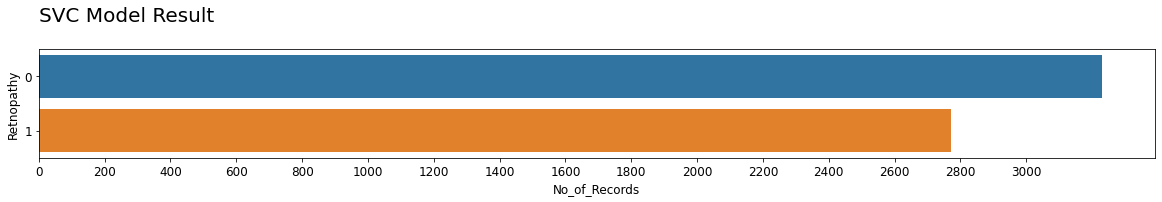

In [227]:

fig, ax = plt.subplots(figsize=(20, 2))
plt.title("SVC Model Result",loc='left',fontsize=20,y=1.2)

sns.barplot(x=table.No_of_Records,y=table.Retnopathy,orient="h")
plt.xticks(ticks=range(0,3200,200))

plt.show()

In [225]:
from sklearn.calibration import CalibratedClassifierCV

In [211]:
svm=SVC(C=10,gamma=0.1,kernel='rbf')
clf = CalibratedClassifierCV(svm) 
clf.fit(X_test,y_test)
probability1=clf.predict_proba(X)

#prob_0=pd.Series(probability[:,0])

In [219]:
y_pred_prob_df = pd.DataFrame(data=probability1, columns=['Not having retnopathy (0)', 'having retnopathy (1)'])

y_pred_prob_df

,Not having retnopathy (0),having retnopathy (1)
0,0.295511,0.704489
1,0.283754,0.716246
2,0.197583,0.802417
3,0.108538,0.891462
4,0.168260,0.831740
...,...,...
5995,0.827167,0.172833
5996,0.310613,0.689387
5997,0.208536,0.791464
5998,0.242424,0.757576


In [220]:
d_R=Dibetic_retinopathy.copy()

In [221]:
final_table=pd.concat([d_R,y_pred_prob_df],axis=1)

In [222]:
final_table

,age,sys_bp,dis_bp,chol,prognosis,Not having retnopathy (0),having retnopathy (1)
0,77.0,85.3,80.0,80.0,1,0.295511,0.704489
1,64.0,99.4,84.9,110.4,1,0.283754,0.716246
2,69.0,111.3,109.9,100.8,1,0.197583,0.802417
3,83.0,95.1,79.7,87.1,1,0.108538,0.891462
4,78.0,109.2,90.7,92.5,1,0.168260,0.831740
...,...,...,...,...,...,...,...
5995,50.0,94.9,86.6,107.6,0,0.827167,0.172833
5996,63.0,100.0,93.5,105.0,1,0.310613,0.689387
5997,56.0,98.4,102.7,120.9,1,0.208536,0.791464
5998,63.0,106.8,88.1,106.1,1,0.242424,0.757576


In [205]:
prob_1=pd.Series(probability[:,1])


In [208]:
d_R=Dibetic_retinopathy.copy()

In [209]:
d_R

,age,sys_bp,dis_bp,chol,prognosis
0,77.0,85.3,80.0,80.0,1
1,64.0,99.4,84.9,110.4,1
2,69.0,111.3,109.9,100.8,1
3,83.0,95.1,79.7,87.1,1
4,78.0,109.2,90.7,92.5,1
...,...,...,...,...,...
5995,50.0,94.9,86.6,107.6,0
5996,63.0,100.0,93.5,105.0,1
5997,56.0,98.4,102.7,120.9,1
5998,63.0,106.8,88.1,106.1,1


In [228]:
Final_table=pd.concat([Dibetic_retinopathy,prob_0,prob_1],axis=1,ignore_index=True)

In [149]:
m_scores=svc_cross_val.mean()*100
m_scores

fit_time          115.904100
score_time         17.550969
test_accuracy      74.866667
test_precision     74.248978
test_recall        78.329446
test_f1            76.222829
dtype: float64

In [136]:
Algorithms_score = Algorithms_score.append( {'Classifier':'Support vector Machine',
                               'Training_Acc':(svc_train_acc*100),
                               'Testing_Acc':(svc_train_acc*100),
                               'Overall_Acc':m_scores[2],
                               'Overall_Precision':m_scores[3],
                               'Overall_Recall':m_scores[4],'Overall_f1_score':m_scores[5]},ignore_index=True) 

In [94]:
Algorithms_score 

,Classifier,Training_Acc,Testing_Acc,Overall_Acc,Overall_Precision,Overall_Recall,Overall_f1_score
0,Logistic Regression,74.452381,74.777778,74.416667,75.664815,74.14975,74.877051
1,Decision Tree,76.02381,72.333333,72.55,73.378218,73.599588,73.374231
2,Random Forest,75.904762,73.277778,73.7,73.744397,75.932312,74.812168
3,KNN,77.238095,73.0,73.8,74.112258,75.477872,74.766065
4,Naive Bayes Gaussian,73.5,73.5,73.25,75.818024,70.48985,73.044298
5,Adaboost Classifire,75.809524,75.809524,73.983333,75.426088,73.339848,74.349491
6,XGboost,93.47619,93.47619,72.25,72.675777,73.891165,73.257059
7,Support vector Machine,75.833333,75.833333,74.866667,74.248978,78.329446,76.222829


In [95]:
Algorithms_score

,Classifier,Training_Acc,Testing_Acc,Overall_Acc,Overall_Precision,Overall_Recall,Overall_f1_score
0,Logistic Regression,74.452381,74.777778,74.416667,75.664815,74.14975,74.877051
1,Decision Tree,76.02381,72.333333,72.55,73.378218,73.599588,73.374231
2,Random Forest,75.904762,73.277778,73.7,73.744397,75.932312,74.812168
3,KNN,77.238095,73.0,73.8,74.112258,75.477872,74.766065
4,Naive Bayes Gaussian,73.5,73.5,73.25,75.818024,70.48985,73.044298
5,Adaboost Classifire,75.809524,75.809524,73.983333,75.426088,73.339848,74.349491
6,XGboost,93.47619,93.47619,72.25,72.675777,73.891165,73.257059
7,Support vector Machine,75.833333,75.833333,74.866667,74.248978,78.329446,76.222829


<AxesSubplot:xlabel='Training_Acc', ylabel='Classifier'>

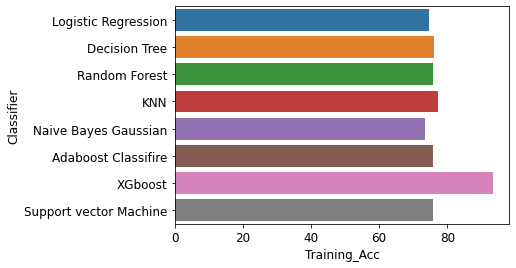

In [96]:
sns.barplot(x=Algorithms_score["Training_Acc"],y=Algorithms_score["Classifier"])

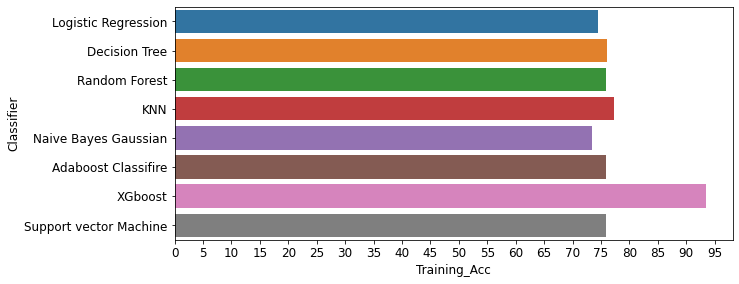

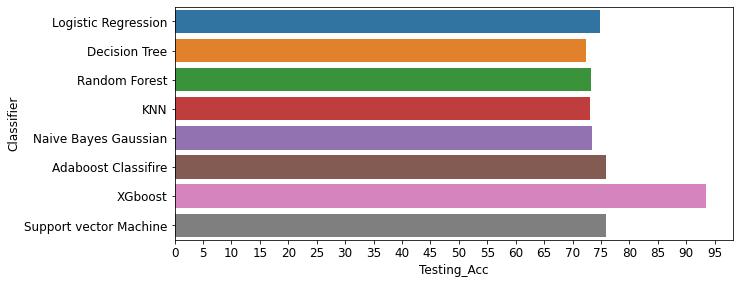

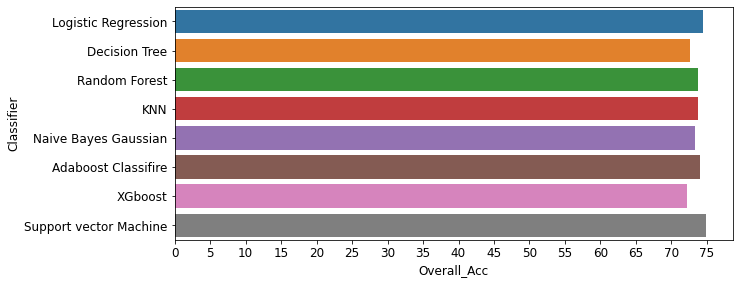

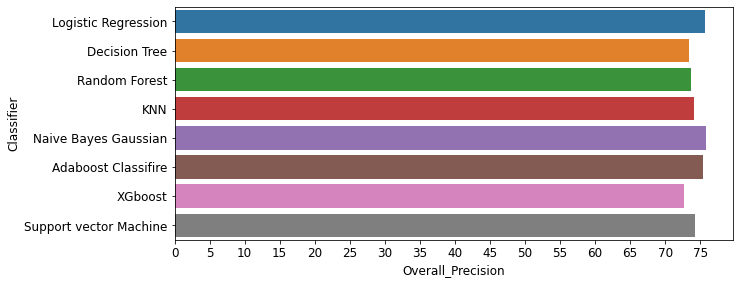

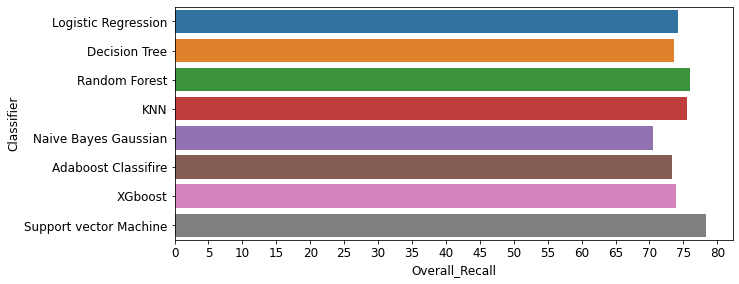

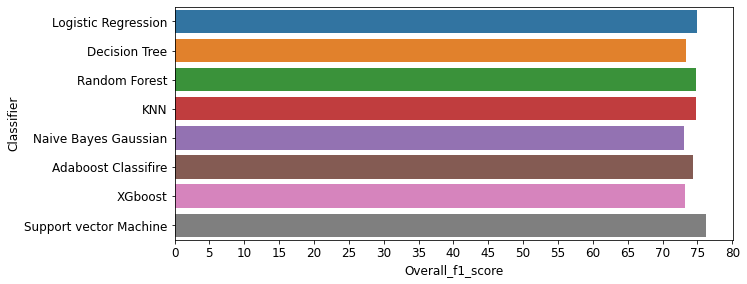

In [97]:

x1=Algorithms_score.iloc[:,0]
for i in range(1,7):
    plt.figure(figsize=(10,30))
    plt.subplot(6,1,i)
    plt.xticks(range(0,105,5))
    sns.barplot(x=Algorithms_score.iloc[:,i],y=x1)

In [98]:
from pickle import dump
from pickle import load

In [99]:
# Save the model from disk 
filename='Retanopathy_model.sav'
dump(svc,open(filename,'wb'))